# Liquid-liquid equilibrium in polymer solutions

## Estimation of Flory-Huggins interaction parameter from XS test data

### Paper 1

This notebook contains an estimation procedure for the parameters of the Flory-Huggins model applied to the LLE data presented in [MATOS *et al.* (2001)](https://onlinelibrary.wiley.com/doi/full/10.1002/1097-4628%2820010314%2979%3A11%3C2076%3A%3AAID-APP1017%3E3.0.CO%3B2-%23).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from plt_tools import get_figsize, set_plt_rc

from Tompa import Tompa

In [3]:
for_paper = True
language = 'en'

plt = set_plt_rc(plt, for_paper=for_paper)

## Experimental data

In [4]:
z_sol = 0.97738

labels_pols = ['H1_9','H2_31','H3_8','H4_32','H5_29','H6_13','H8_11']

teta1 = 1e-4*np.array([[1.29, 0.000], [1.55, 0.0], [1.58, 1.163],
                       [1.63, 1.266], [1.37, 0.0], [1.39, 1.406],
                       [1.85, 0.0]])

teta2 = 1e-4*np.array([[6.08, 6.348], [5.6, 19.44], [6.57, 13.07],
                      [0.00, 10.52], [5.2, 12.38], [7.40, 16.20],
                      [6.30, 24.07]])

alpha = np.array([[0.868, 0.000],[0.237, 0.000],[0.549, 0.053],
                  [1.000, 0.145],[0.839, 0.000],[0.655, 0.083],
                  [0.353, 0.000]])

mw = np.array([582261, 242779, 349674, 514920, 540133, 435169, 246094])

xs = 1e-2*np.array([3.98, 4.58, 4.59, 3.43, 6.67, 6.48, 4.53])

# creating list of objects for each polymer
polymers = [Tompa(label=labels_pols[i], z_sol = z_sol,
                  shulz_kind='3P', r_pol = np.arange(1e1,4e4),
                  teta1 = teta1[i], teta2 = teta2[i],
                  alpha = alpha[i],xs_fraction = xs[i]) 
            for i in range(len(labels))]

## Parameter estimation

In [5]:
for i in range(len(polymers)):
    polymers[i].estimation()

## Plotting results

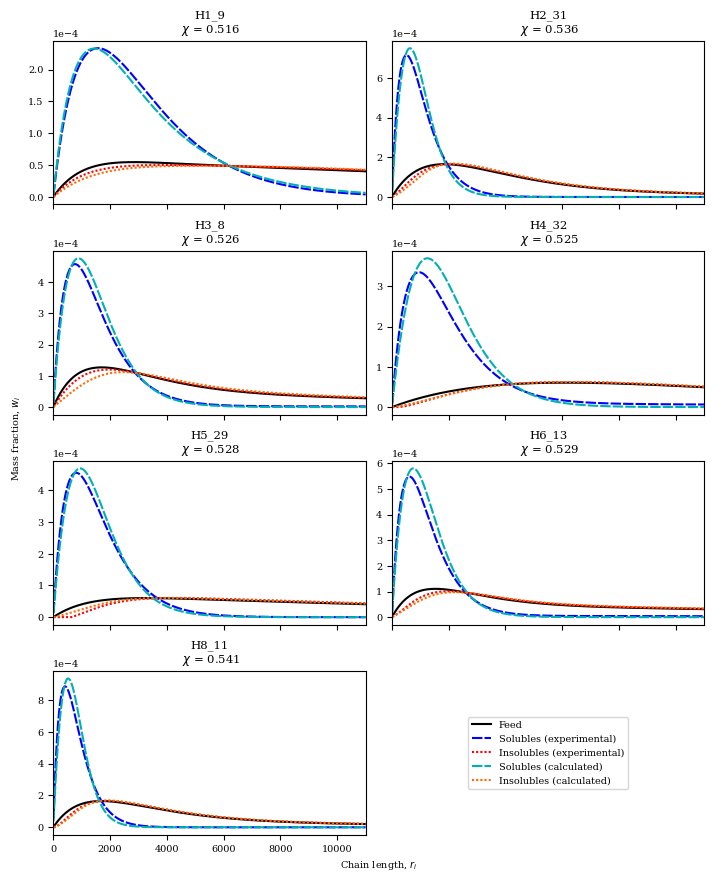

In [36]:
if for_paper:
    fs = get_figsize(columnwidth=190, hf_abs = 230, unit='mm')

fig, ax = plt.subplots(4,2,figsize=fs,sharex=True)#,sharey=True)

for i in range(len(polymers)):
    polymers[i].plot_Experimental_Distributions(ax=ax.ravel()[i])
    polymers[i].plot_Calculated_Distributions(ax=ax.ravel()[i])
    ax.ravel()[i].set_title(labels_pols[i]+f'\n $\chi$ = {polymers[i].A:.3f}')
    ax.ravel()[i].ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))
    ax.ravel()[i].set_xlim([0,1.1e4])

ax[-1,-1].axis('off')

handles, labels = ax[0,0].get_legend_handles_labels()
ax[-1,-1].legend(handles, labels, loc='center')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Chain length, $r_i$")
plt.ylabel("Mass fraction, $w_i$")

fig.tight_layout()

plt.savefig('figures/estimation_paper1.pdf',bbox_inches='tight')

### $\chi$ as a function of XS and MW

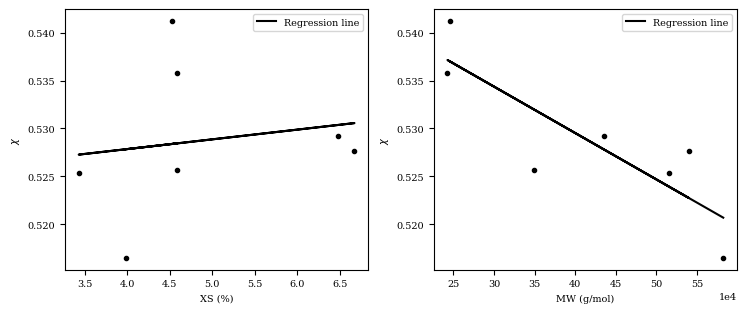

In [92]:
chi = [p.A for p in polymers]

if for_paper:
    fs = get_figsize(columnwidth=190, hf_abs = 80, unit='mm')

a1, b1 = np.polyfit(100*xs, chi, 1)
a2, b2 = np.polyfit(mw, chi, 1)

fig, ax = plt.subplots(1,2,figsize=fs)

ax[0].plot(100*xs,chi,'.',c='k')
ax[0].plot(100*xs,a1*100*xs+b1,c='k',label='Regression line')
ax[0].set_xlabel("XS (%)")
ax[0].set_ylabel("$\chi$")
ax[0].legend()

ax[1].plot(mw,chi,'.',c='k')
ax[1].plot(mw,a2*mw+b2,c='k',label='Regression line')
ax[1].set_xlabel("MW (g/mol)")
ax[1].set_ylabel("$\chi$")
ax[1].legend()
ax[1].ticklabel_format(axis='x', style='sci', scilimits=(4,4))


fig.tight_layout()

fig.savefig('figures/xs_dependencies_paper1.pdf',bbox_inches='tight')

Pearson correlation coefficients:

In [53]:
np.corrcoef(xs, chi)[0,1]

0.15645353383146188

In [43]:
np.corrcoef(mw, chi)[0,1]

-0.8502210554865974